# GRIP: THE SPARKS FOUNDATION

# Data Science and Business Analytics Internship

##  Task 3: Exploratory Data Analysis on "SampleSuperstore" Dataset

### Submitted by Pratibha Barnwal 

#### Importing Important Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
df=pd.read_csv("SampleSuperstore.csv")
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


### Summary of the dataframe 

In [4]:
df.shape

(9994, 13)

From the shape of the data, we observe that there are:

9994 observations (Rows) 13 features (Columns)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## Data Exploration and Preprocessing

Data preprocessing is a data mining approach that converts unstructured data into a format that can be analyzed. Data cleaning, data integration, data transformation, and data reduction are the four primary phases of this process.

**Data Cleaning:** To ensure high-quality data and analysis outcomes, data cleaning will filter, find, and remove dirty data. In this situation, there can be noise in the form of extreme and impossible values, outliers, and missing values. Inconsistent data and redundant properties and data may be among the problems.

**Data Integration:** Since only one dataset is used and there are no schema integrations, there are no evident entity identification problems or data value conflicts, so data integration is not necessary.

**Data Reduction:** Data reduction involves dropping the attribute ‘Country’ through attribute dimensionality reduction, since it is redundant with 100% exact same values of "United States" for all records. 'Postal Code' is also dropped since this attribute is less important towards the profit-centric task.

### Check Missing Values 

In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### Total number of null values in a dataset 

In [7]:
print("Total number of null values in the dataset = ",df.isnull().sum().sum())

Total number of null values in the dataset =  0


### Check for duplicate and dropping element in the dataset

Now, duplicate rows or entries can be removed from the dataset as this redundancy may cause inaccurate results and outcomes.

In [8]:
df.duplicated().sum()

17

In [9]:
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [10]:
# drop Country and postal code as its not necessary for EDA
df = df.drop(['Country', 'Postal Code'], axis = 1)

### Statistical details of the Dataset 

In [11]:
df.describe(include='all')

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,531,49,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,New York City,California,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,915,2001,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


### Function return Series with the specified axis's number of unique observations. 

In [12]:
df.nunique()

Ship Mode          4
Segment            3
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

array([[<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Quantity'}>],
       [<AxesSubplot:title={'center':'Discount'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

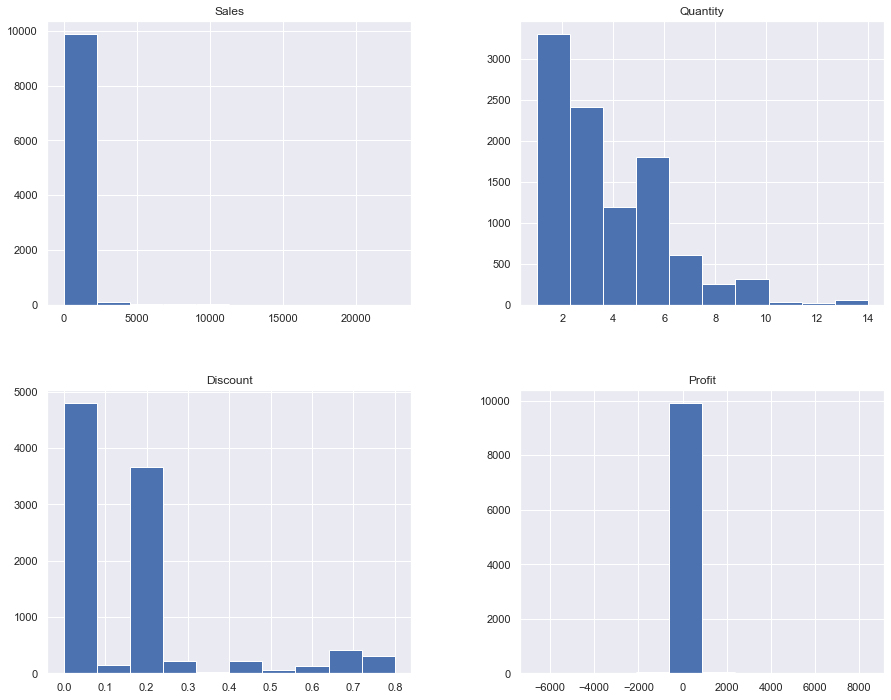

In [13]:
#As 2 float and 2 int data types are in the data, so it will make 4 histograms excluding object data type
df.hist(bins=10, figsize=(15,12))

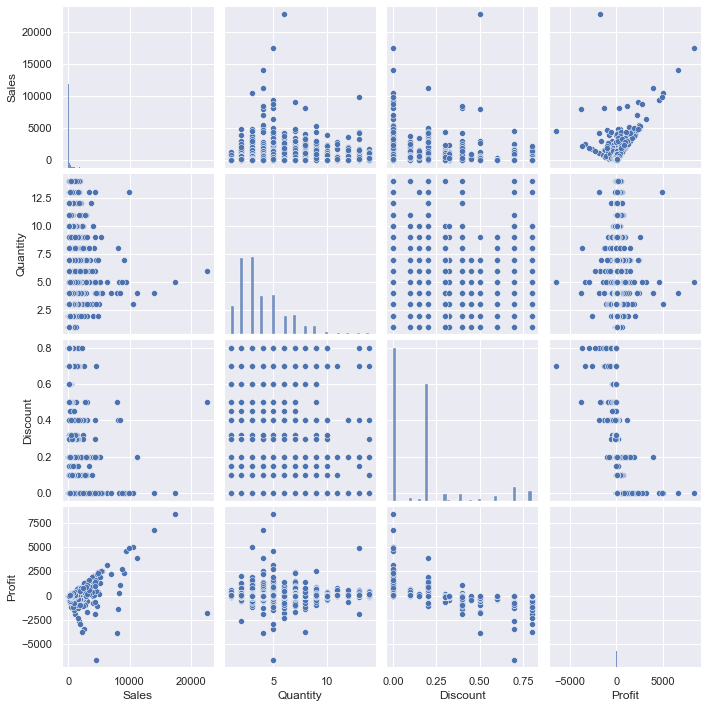

In [34]:
sns.pairplot(df)

#### Compare Linear relationships between attributes using correlation coefficient generated using correlation matrix
 

The correlation will compare and describe the linear connection and relationship between pairs of features, through the type of correlation and its strength.

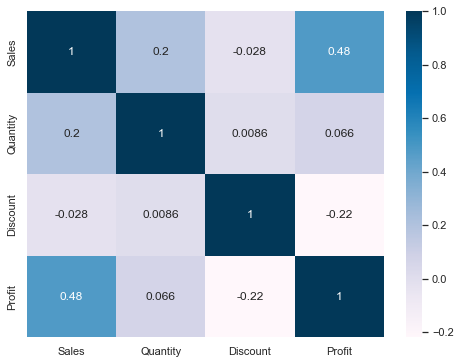

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap = 'PuBu', annot=True) # "annot=True" write the data value in each cell.
plt.show()

Sales and Profit have a moderate positive linear correlation. When Sales increase by USD 1, Profit will increased by USD 0.48


Also Discount and Profit have a weak negative linear correlation. When Discount increase by 1%, Profit will decrease by USD$0.22. This is because discount deductions will reduce overall sales revenues.

**The final dataset information is summarised below.**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Region        9994 non-null   object 
 5   Category      9994 non-null   object 
 6   Sub-Category  9994 non-null   object 
 7   Sales         9994 non-null   float64
 8   Quantity      9994 non-null   int64  
 9   Discount      9994 non-null   float64
 10  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 859.0+ KB


*Data pre-processing is now complete.*

## Exploratory Data Analysis (EDA) 

In [16]:
#Statistical Details after preprocessing
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [17]:
#Total Sales
round(sum(df["Sales"]),2)

2297200.86

In [18]:
#Total Quantity sold
sum(df["Quantity"])

37873

In [19]:
#Total Profit
round(sum(df['Profit']),2)

286397.02

#### Correlation of dataset 

In [20]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


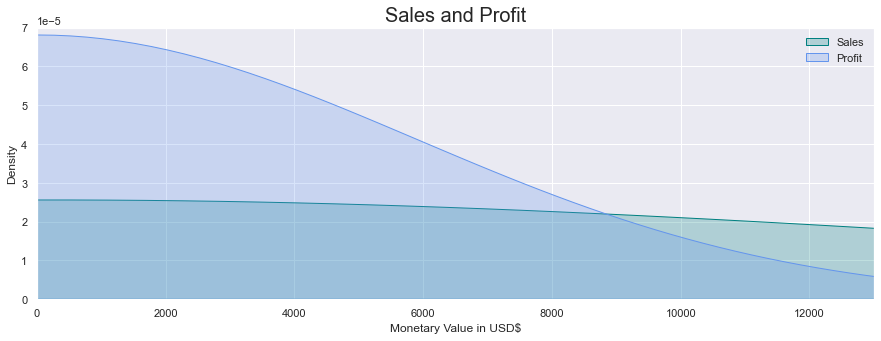

In [21]:
plt.figure(figsize = (15, 5))
# plot Sales and Profit for comparisons
sns.kdeplot(df['Sales'], color = 'Teal', label = 'Sales', shade = True, bw = 25)
sns.kdeplot(df['Profit'], color = 'Cornflowerblue', label = 'Profit', shade = True, bw = 25)
plt.xlim([0, 13000])
plt.ylim([0, 0.00007])
plt.ylabel('Density')
plt.xlabel('Monetary Value in USD$')
plt.title('Sales and Profit', fontsize = 20)
plt.legend(loc = 'upper right', frameon = False) 
plt.show()

Profits are mostly above sales, indicating good business.

### Visualization on individual categories of qualitative attributes and their frequency of occurences

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

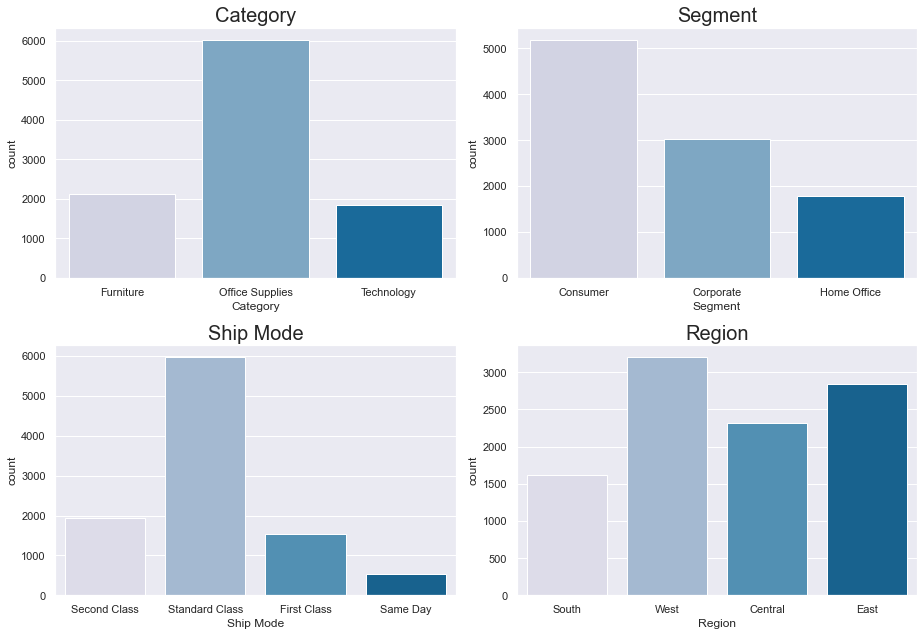

In [22]:
# count of each Category, Segment, Ship Mode, and Region
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(13, 9));
sns.countplot(df['Category'], ax = axs[0][0], palette = 'PuBu')
sns.countplot(df['Segment'], ax = axs[0][1], palette = 'PuBu')
sns.countplot(df['Ship Mode'], ax = axs[1][0], palette = 'PuBu')
sns.countplot(df['Region'], ax = axs[1][1], palette = 'PuBu')
axs[0][0].set_title('Category', fontsize = 20)
axs[0][1].set_title('Segment', fontsize = 20)
axs[1][0].set_title('Ship Mode', fontsize = 20)
axs[1][1].set_title('Region', fontsize = 20)
plt.tight_layout()

According to the above graph:
**Category** has instances for Furniture more than 2k, Office supply category 6K and Technology has almost 2k. Therefore data available for "Office Supplies" has almost 3 times the proportion than that for the other two categories.

**Segment** has Consumer more than 5K, Corporate segment 3k and Home Office has around 2k. Hence, data available for "Consumer" is the sum of that of other two categories.

**Ship Mode** has Second class with over 2k instances, Standard Class has 6k, First class has 1.5k and Same day is at 500. So data available for "Standard Class" has almost 3 times the proportion than that for "Second Class" and "First Class" categories, and 12 times that for "Same Day".

**Region** has South at 1.6k, is the highest with over 3k instances, Central has around 2.25k and East has 2.75k. So data available for all 4 categories are differing.

### Relationships between Sales and Profit for all transactions. 


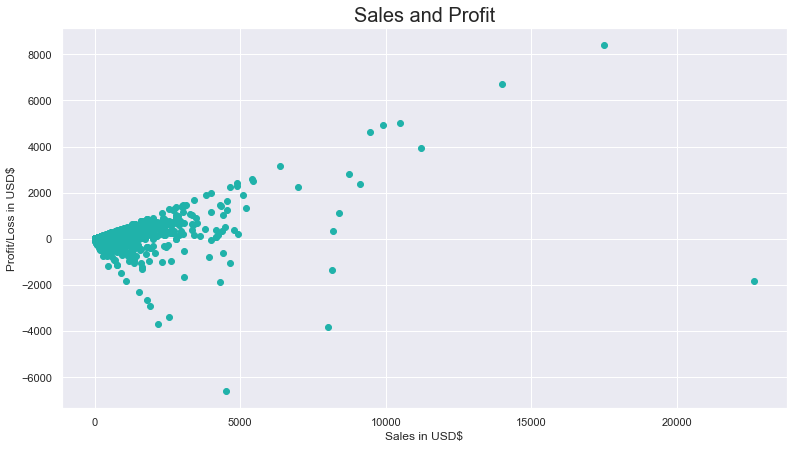

In [23]:
fig, ax = plt.subplots(figsize = (13, 7))
# scatterplot of Profit and Sales
ax.scatter(df["Sales"] , df["Profit"], color = 'lightseagreen')
ax.set_xlabel('Sales in USD$')
ax.set_ylabel('Profit/Loss in USD$')
plt.title('Sales and Profit', fontsize = 20)
plt.show()

Most sales are less than USD 5k. The transactions under USD 2.5k result in a loss, whereas Larger sales above USD 2.5k are very likely to result in a profit

## (1) Profit/Sales Analysis based on Ship Mode 

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

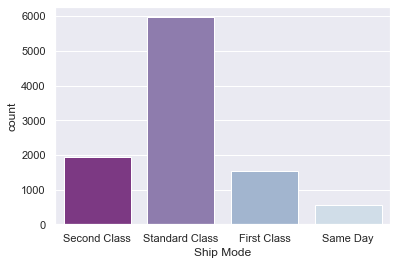

In [40]:
sns.countplot(x='Ship Mode', data=df, palette='BuPu_r')

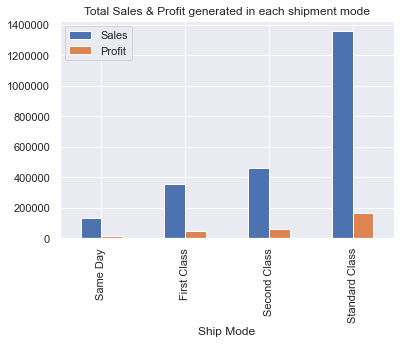

In [42]:
df.groupby(['Ship Mode'])[['Sales', 'Profit']].sum().sort_values('Profit').plot(kind='bar')
plt.ticklabel_format(style='plain',axis='y')
plt.title('Total Sales & Profit generated in each shipment mode')
plt.show()

In [44]:
df_shipmode = df.groupby(['Ship Mode'])[['Sales', 'Profit', 'Discount']].mean()
df_shipmode

,Sales,Profit,Discount
Ship Mode,,,
First Class,228.497024,31.839948,0.164610
Same Day,236.396179,29.266591,0.152394
Second Class,236.089239,29.535545,0.138895
Standard Class,227.583067,27.494770,0.160023


In [83]:
colors_3 = ['turquoise', 'plum','lightsalmon']
colors_4 = ['lightskyblue','aquamarine','sandybrown','mediumorchid']

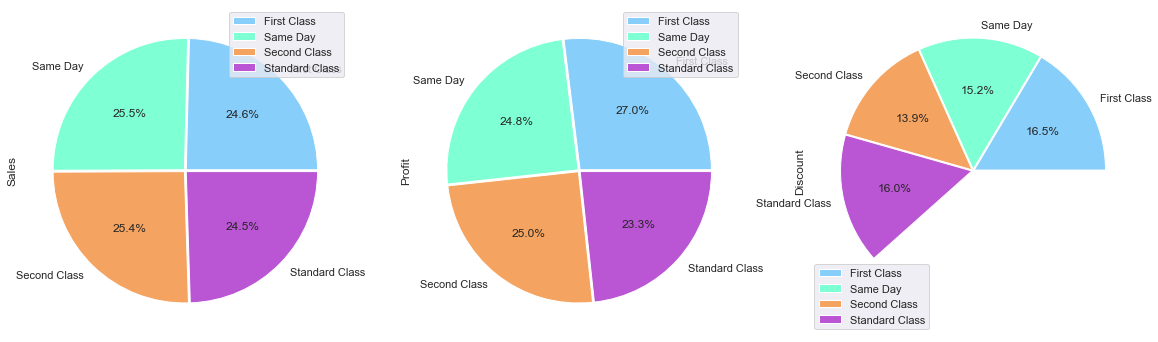

In [64]:
df_shipmode.plot.pie(subplots=True, figsize=(20,10), labels=data_shipmode.index, autopct='%1.1f%%', 
                       explode=(0.01,0.01,0.01,0.01), colors=colors_4)
plt.show()

**Sale: 
Lowest sales:** Standard Class (24.5%) and

**Highest sales:** Same Day (25.5%)

**Profit: Lowest profit:** Standard Class (23.3%) and

**Highest profit:** First class (27.0%)

## (2) Profit/Sales Analysis based on Segment  

<AxesSubplot:xlabel='Segment', ylabel='count'>

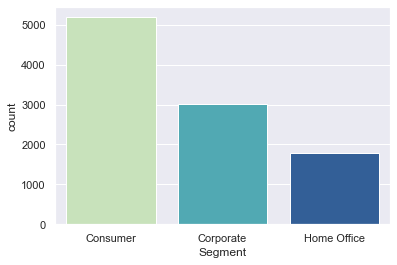

In [57]:
sns.countplot(x='Segment', data=df, palette='YlGnBu')

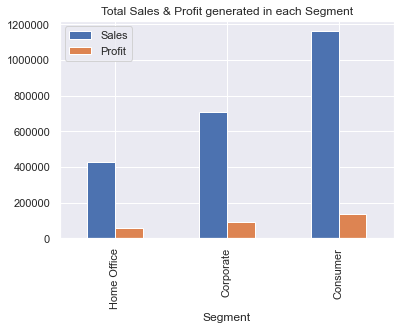

In [85]:
df.groupby(['Segment'])[['Sales', 'Profit']].sum().sort_values('Profit').plot(kind='bar')
plt.ticklabel_format(style='plain',axis='y')
plt.title('Total Sales & Profit generated in each Segment')
plt.show()

In [58]:
df_segment = df.groupby(['Segment'])[['Sales', 'Profit', 'Discount']].mean()

array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Profit'>,
       <AxesSubplot:ylabel='Discount'>], dtype=object)

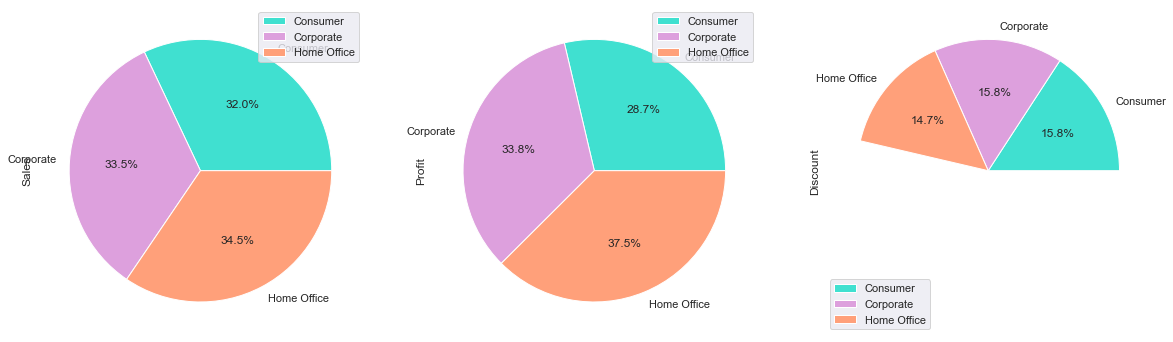

In [84]:
df_segment.plot.pie(subplots=True, figsize=(20,10), labels=df_segment.index, autopct='%1.1f%%', colors=colors_3)

**Sale: 
Lowest sales:** Consumer (32%) and

**Highest sales:** Home Office (34.5%)

**Profit: Lowest profit:** Consumer (28.7%) and

**Highest profit:** Home Office (37.5%)

## (3) Profit/Sales Analysis based on Region 

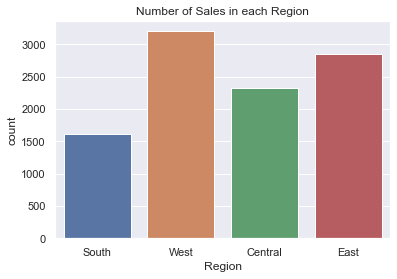

In [86]:
sns.countplot(data=df,x='Region')
plt.title('Number of Sales in each Region')
plt.show()

#### Average Sales and Profit-Loss for Region 

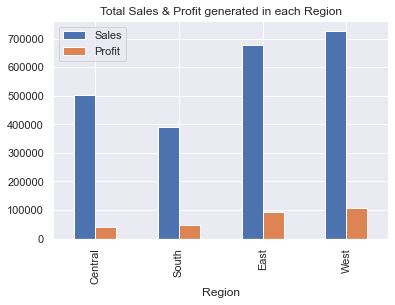

In [87]:
df.groupby(['Region'])[['Sales', 'Profit']].sum().sort_values('Profit').plot(kind='bar')
plt.ticklabel_format(style='plain',axis='y')
plt.title('Total Sales & Profit generated in each Region')
plt.show()

In [88]:
df.groupby(['Region'])[['Sales', 'Profit','Discount']].mean()

,Sales,Profit,Discount
Region,,,
Central,215.772661,17.092709,0.240353
East,238.336110,32.135808,0.145365
South,241.803645,28.857673,0.147253
West,226.493233,33.849032,0.109335


**West Areas** are getting highest sales as well as highest profit.

C:\Users\HP\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1616: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


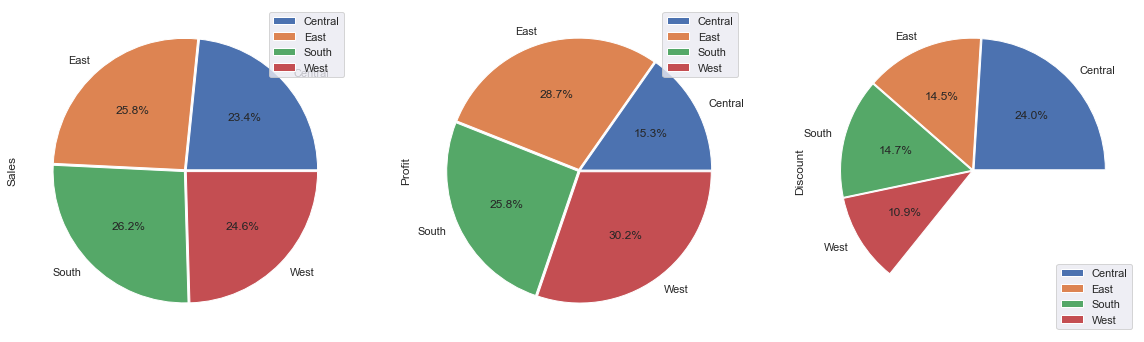

In [89]:
df.groupby(['Region'])[['Sales', 'Profit','Discount']].mean().plot.pie(subplots=True, figsize=(20,10),
                                                   labels=df.groupby(['Region'])[['Sales', 'Profit']].mean().index,
                                                   autopct='%1.1f%%', explode=(0.01,0.01,0.01,0.01))
plt.show()

**Sale: 
Lowest sales:** Central (23.4%) and

**Highest sales:** South (26.2%)

**Profit: Lowest profit:** Central (15.3%) and

**Highest profit:** West (30.2%)

The Central area offers the highest discounts compared to the other regions, which has an impact on their ability to turn a profit.

### (4) Profit/Sales Analysis based on State-wise

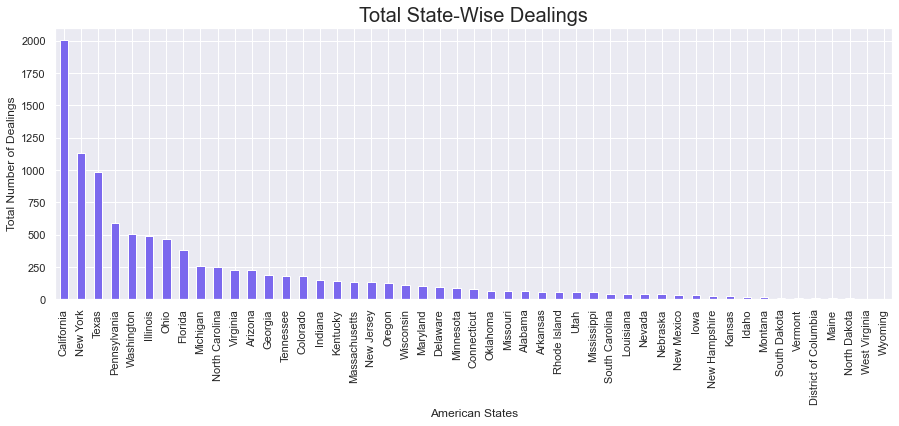

In [24]:
df_state_dealings = df.groupby('State')['Quantity'].count().sort_values(ascending = False).plot.bar(figsize = (15, 5), 
                                                                                                    color = 'mediumslateblue')
plt.ylabel('Total Number of Dealings')
plt.xlabel('American States')
plt.title('Total State-Wise Dealings', fontsize = 20)
plt.show()

California, New York and Texas has the highest sales where as the states of Wyoming, South Dakota, Maine, West Virginia, and North Dakota have comparatively negligible sales. 

### State-wise Profit-Loss

**Total Profit for each State**

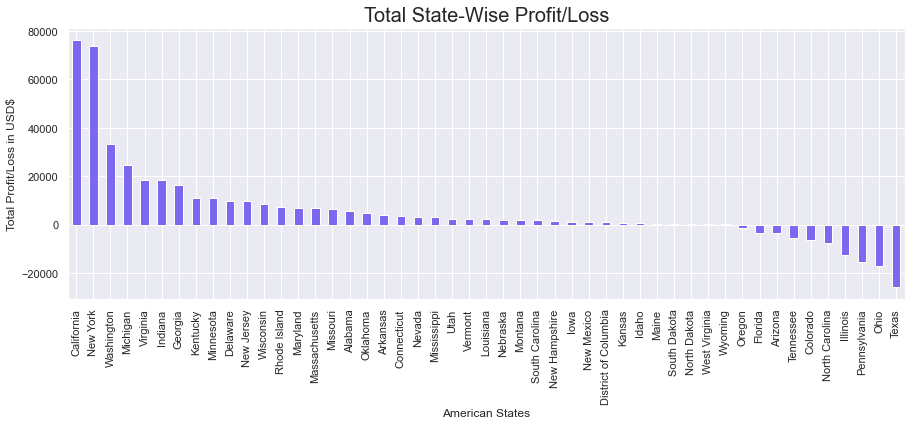

In [25]:
df_state_profit = df.groupby('State')['Profit'].sum().sort_values(ascending = False).plot.bar(figsize = (15, 5), 
                                                                                              color = 'mediumslateblue')
plt.ylabel('Total Profit/Loss in USD$')
plt.xlabel('American States')
plt.title('Total State-Wise Profit/Loss', fontsize = 20)
plt.show()

Texas and Ohio are the least profitable cities.

### (5) Profit & Sales analysis based on each Category 

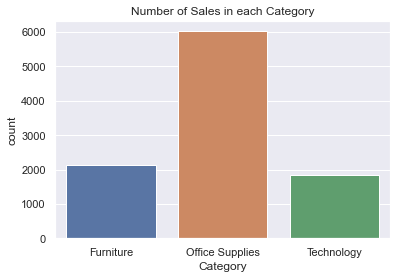

In [91]:
sns.countplot(data=df,x='Category')
plt.title('Number of Sales in each Category')
plt.show()

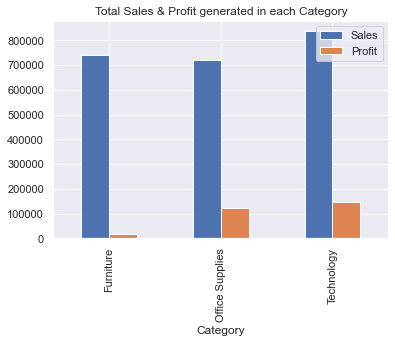

In [92]:
df.groupby(['Category'])[['Sales', 'Profit']].sum().sort_values('Profit').plot(kind='bar')
plt.ticklabel_format(style='plain',axis='y')
plt.title('Total Sales & Profit generated in each Category')
plt.show()

In [93]:
df.groupby(['Category'])[['Sales', 'Profit','Discount']].mean()

,Sales,Profit,Discount
Category,,,
Furniture,349.834887,8.699327,0.173923
Office Supplies,119.324101,20.327050,0.157285
Technology,452.709276,78.752002,0.132323


C:\Users\HP\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1616: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


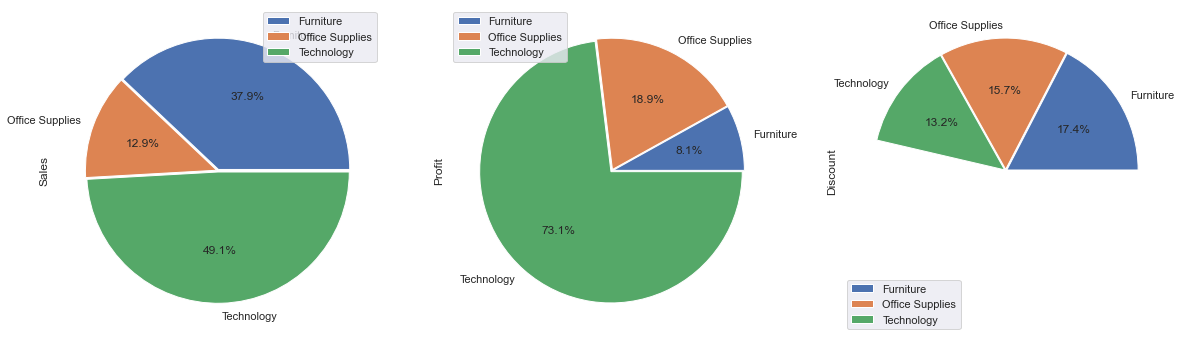

In [94]:
df.groupby(['Category'])[['Sales', 'Profit','Discount']].mean().plot.pie(subplots=True, figsize=(20,10),
                                                        labels=df.groupby(['Category'])[['Sales', 'Profit']].mean().index,
                                                        autopct='%1.1f%%', explode=(0.01,0.01,0.01))
plt.show()

**Lowest Sales:** Office Supplies (12.9%)

**Highest Sales:** Technology (49.1%)

**Lowest Profit:** Furniture (8.1%)

**Highest Profit:** Technology (73.1%)

In [95]:
furniture_cat=df[df['Category']=='Furniture']

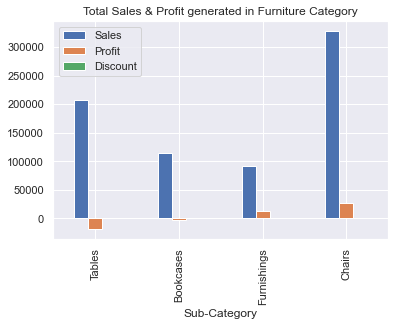

In [96]:
furniture_cat.groupby(['Sub-Category'])[['Sales', 'Profit','Discount']].sum().sort_values('Profit').plot(kind='bar')
plt.ticklabel_format(style='plain',axis='y')
plt.title('Total Sales & Profit generated in Furniture Category')
plt.show()

Tables and bookcases are two major sub-categories that lead Furniture to the loss category.

### (6) Profit & Sales analysis based on Sub-Category 

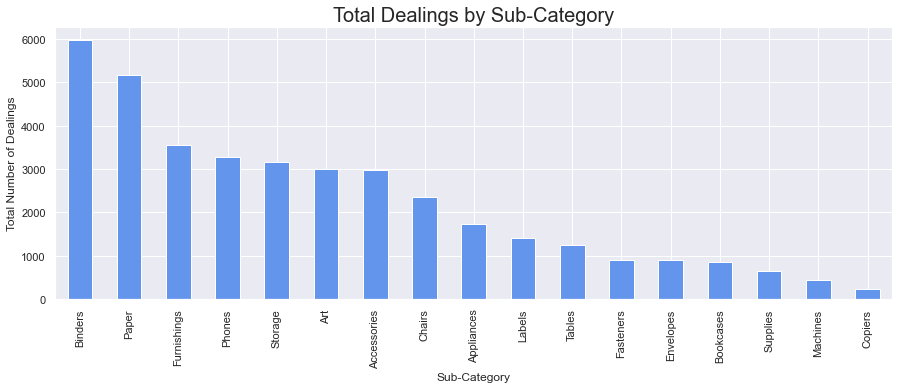

In [99]:
df_state_dealings = df.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending = False).plot.bar(figsize = (15, 5), 
                                                              color = 'Cornflowerblue')
plt.ylabel('Total Number of Dealings')
plt.xlabel('Sub-Category')
plt.title('Total Dealings by Sub-Category', fontsize = 20)
plt.show()

Binders and Paper are significantly more popular than the other products offered, with around 6k sales and more than 5k.

### Average Sales and Profit/Loss for Sub-Category 

#### Sales for each Sub-category 

In [103]:
df_subcat = df.groupby(['Sub-Category'])[['Sales','Profit']].mean()

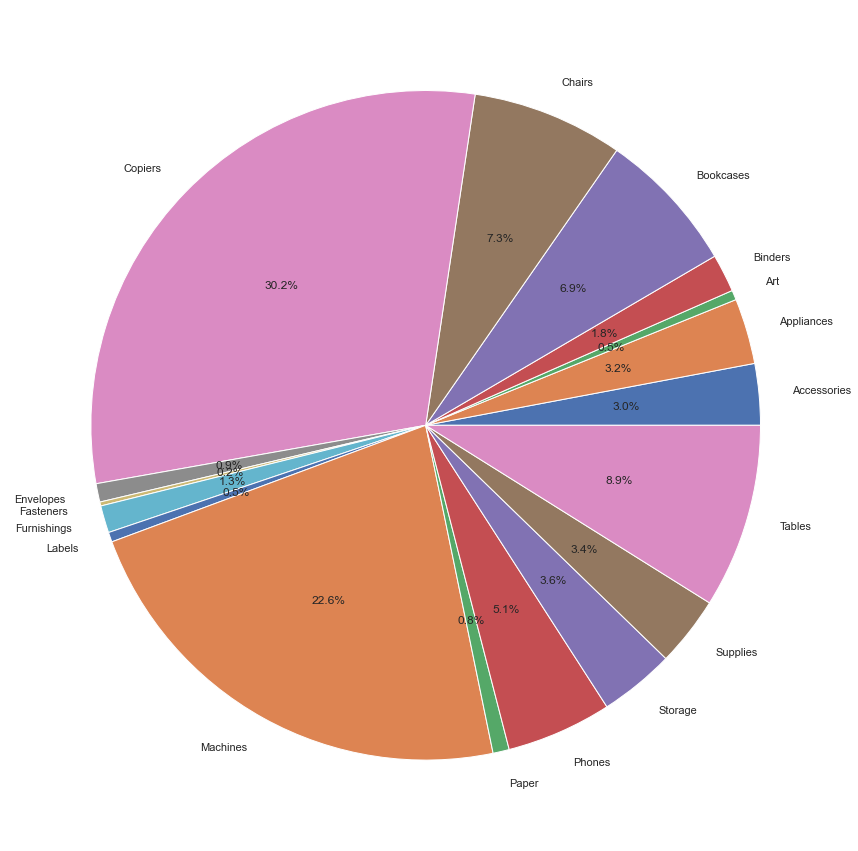

In [104]:
plt.figure(figsize=(15,18))
plt.pie(df_subcat['Sales'], labels = df_subcat.index, autopct='%1.1f%%')
plt.show()

#### Profits for Sub-categories 

<AxesSubplot:xlabel='Sub-Category'>

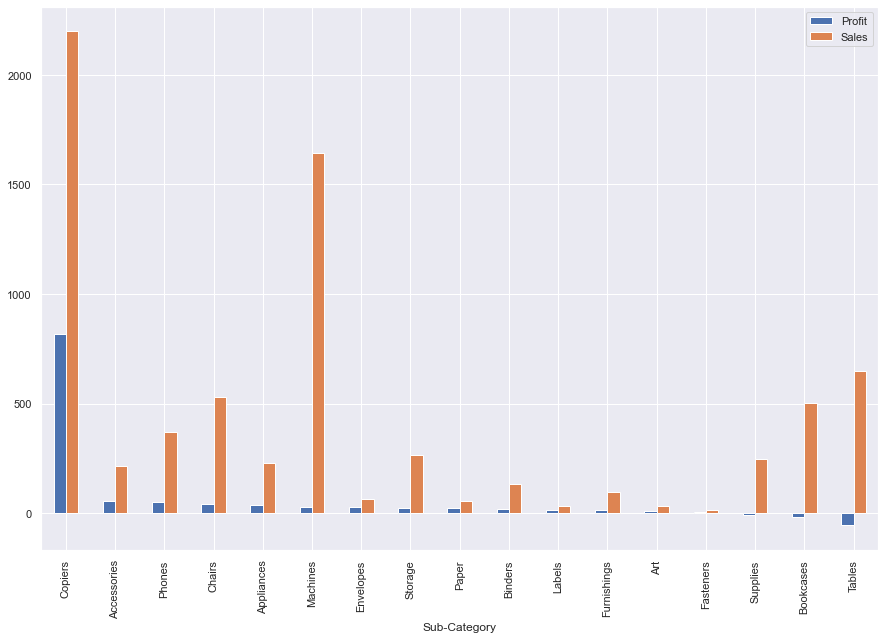

In [106]:
df_subcat.sort_values('Profit', ascending = False)[['Profit','Sales']].plot(kind='bar', figsize=(15,10))

Copiers sub-category has Highest Sales and Profit

In [107]:
df_subcat.sum(axis=0)

Sales     7291.511064
Profit    1095.221304
dtype: float64

In [109]:
df_subcat['Sales%'] = df_subcat['Sales']/72.915
df_subcat['Profit%'] = df_subcat['Profit']/10.952

In [110]:
df_subcat.sort_values('Sales')

,Sales,Profit,Sales%,Profit%
Sub-Category,,,,
Fasteners,13.936774,4.375660,0.191137,0.399531
Art,34.068834,8.200737,0.467240,0.748789
Labels,34.303055,15.236962,0.470453,1.391249
Paper,57.284092,24.856620,0.785628,2.269596
Envelopes,64.867724,27.418019,0.889635,2.503471
Furnishings,95.825668,13.645918,1.314211,1.245975
Binders,133.560560,19.843574,1.831730,1.811868
Accessories,215.974604,54.111788,2.962005,4.940813
Appliances,230.755710,38.922758,3.164722,3.553941


**Weak Areas to work on to get more Profit**

The above stats shows that selling "Supplies, Bookcases and Tables" result in huge losses. As a result, Super Store must consider bundling them with High Selling or Profitable sub-categories such as Chairs, Copiers, Phones, and Office Supplies items. Consider removing items from the catalogue or switching suppliers and bargaining for a lower price.

#### Cities with Lowest Sales

In [120]:
city_sales_df = pd.DataFrame(df.groupby(['City'])['Sales', 'Quantity'].sum().sort_values('Sales',ascending = False))

top10 = city_sales_df[:10]
top10

C:\Users\HP\AppData\Local\Temp/ipykernel_5412/1619533704.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  city_sales_df = pd.DataFrame(df.groupby(['City'])['Sales', 'Quantity'].sum().sort_values('Sales',ascending = False))


,Sales,Quantity
City,,
New York City,256368.1610,3417
Los Angeles,175851.3410,2879
Seattle,119540.7420,1590
San Francisco,112669.0920,1935
Philadelphia,109077.0130,1981
Houston,64504.7604,1466
Chicago,48539.5410,1132
San Diego,47521.0290,670
Jacksonville,44713.1830,429


In [122]:
last10 = city_sales_df[-10:]
last10

,Sales,Quantity
City,,
Missouri City,6.370,7
Keller,6.000,2
Layton,4.960,4
Springdale,4.300,2
San Luis Obispo,3.620,2
Ormond Beach,2.808,3
Pensacola,2.214,3
Jupiter,2.064,1
Elyria,1.824,1


Thus Jupiter, Elyria and Abilene are the last three cities with lowest sales

And there is a significant difference between the cities with the highest and lowest sales. The top ten cities must be targeted in the marketing plan.

### Thank You! 